#  DATA CLEANING CHALLENGE: World Indicators Dataset

### Index

[1. Importing libraries and dataset](#1)<br>
[2. Missing values](#2)<br>
[3. Duplicates](#3)<br>
[4. Outliers](#4)<br>
[5. New features](#5)<br>
[6. Exporting dataset](#6)<br>

<a id="1"></a>
## 1. Importing libraries and dataset

In this data cleaning challenge we will look at the World Indicators Dataset which is the collection of development indicators that presents the most current and accurate global development data available, and includes national, regional and global estimates.
This dataset that has originated from the [World Bank](https://databank.worldbank.org/source/world-development-indicators).

First things first let's import some necessary libraries, in this case we will be using Python **Pandas library**.\
We also read our downloaded dataset into pandas DataFrame object, parsing the Year column as **datetime64** data type.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data - World_indicators.csv", parse_dates = [2])

Let's take a look at some of the data.

In [4]:
pd.set_option('display.max_columns', 100)
df.sample(10)

,Country/Region,Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
536,Portugal,Europe,2002-12-01,0.011,NaN,66820.0,NaN,NaN,25824.0,1.320000e+11,0.093,1190.0,NaN,0.005,0.194,NaN,81.0,74.0,0.834,1,0.159,0.675,0.166,10419631,0.557,6.595000e+09,2.631000e+09
1911,Slovenia,Europe,2009-12-01,0.011,0.367,15310.0,6.0,NaN,7097.0,4.920838e+10,0.092,2235.0,260.0,0.003,0.640,0.059,82.0,76.0,1.027,1,0.140,0.696,0.165,2039669,0.501,2.735000e+09,1.456000e+09
95,Cyprus,Europe,2000-12-01,0.013,NaN,6850.0,NaN,NaN,2137.0,9.314938e+09,0.058,744.0,NaN,0.006,0.153,0.080,80.0,76.0,0.231,1,0.224,0.674,0.102,943287,0.686,2.137000e+09,5.430000e+08
2646,Guatemala,The Americas,2011-12-01,0.032,0.409,NaN,37.0,NaN,10163.0,4.765479e+10,0.067,215.0,344.0,0.028,0.123,0.134,75.0,68.0,1.325,1,0.412,0.544,0.045,14706578,0.498,1.350000e+09,9.350000e+08
2240,Tonga,Oceania,2008-12-01,0.028,0.275,161.0,25.0,NaN,NaN,3.468502e+08,0.063,207.0,164.0,0.012,0.081,0.125,75.0,69.0,0.490,1,0.377,0.563,0.059,102947,0.233,1.950000e+07,2.510000e+07
1844,Germany,Europe,2008-12-01,0.008,0.494,783359.0,18.0,NaN,334634.0,3.620000e+12,0.107,4718.0,196.0,0.004,0.780,NaN,82.0,77.0,1.266,1,0.137,0.660,0.202,82110097,0.739,5.339800e+10,NaN
2438,Cayman Islands,The Americas,2007-12-01,0.014,NaN,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520,NaN,NaN,NaN,1.972,1,NaN,NaN,NaN,51472,1.000,4.810000e+08,1.320000e+08
2410,Suriname,The Americas,2006-12-01,0.020,0.279,2442.0,694.0,NaN,714.0,2.626093e+09,0.062,323.0,199.0,0.025,0.095,0.156,73.0,66.0,0.633,1,0.297,0.641,0.062,505186,0.666,1.090000e+08,3.300000e+07
2046,Romania,Europe,2012-12-01,0.010,0.429,NaN,10.0,73.0,NaN,1.690000e+11,0.051,420.0,216.0,0.011,0.459,0.113,78.0,71.0,1.050,1,0.150,0.700,0.150,20076727,0.541,1.919000e+09,2.112000e+09
544,Sweden,Europe,2002-12-01,0.011,NaN,57425.0,NaN,NaN,51784.0,2.510000e+11,0.092,2599.0,NaN,0.003,0.706,0.056,82.0,78.0,0.892,1,0.181,0.647,0.172,8924958,0.841,5.671000e+09,8.221000e+09


From the first outlook on the data we can already see some missing values, that can cause us problems with later analysis and visualization.\
The project goal is to have clean dataset that we will use for vizualization of development indicators and in this spirit we can start with our cleaning challenge!

<a id="2"></a>
## 2. Missing Data

We define a function that creates a table with total number of NaN values for particular column, percentage of all observations and data type of the column to help us decide what to do next with the NaNs.

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    table['Types'] = types
    return(np.transpose(table))

In [8]:
missing_data(df)

,Country/Region,Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Total,0,0,0,119,1268,566,973,2506,906,197,296,296,1275,247,173,811,136,136,160,0,220,220,220,0,26,366,469
Percent,0.0,0.0,0.0,4.422148,47.12003,21.033073,36.157562,93.125232,33.667781,7.320699,10.999628,10.999628,47.380156,9.178744,6.428837,30.137495,5.053883,5.053883,5.945745,0.0,8.175399,8.175399,8.175399,0.0,0.966184,13.600892,17.428465
Types,object,object,datetime64[ns],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64


One of the most important questions we can ask ourselves is if the missing values wasn't recorded or just doesn' t exist?
In our case, having the dataset on world indicators, and assessing some of the columns namely "GDP",  we can conclude that our missing values were **not recorded**. Most of the missing values are coming from third world countries and islands were collecting data can be problem due to **lack of resources**.

In [9]:
df[df["GDP"].isnull()]

,Country/Region,Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
42,Somalia,Africa,2000-12-01,0.049,NaN,517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,0.000,NaN,52.0,49.0,0.011,1,0.472,0.499,0.029,7385416,0.332,NaN,NaN
44,South Sudan,Africa,2000-12-01,0.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110,NaN,NaN,50.0,48.0,NaN,1,0.447,0.523,0.030,6652984,0.165,NaN,NaN
53,Afghanistan,Asia,2000-12-01,0.050,NaN,781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095,NaN,NaN,56.0,54.0,NaN,1,0.495,0.485,0.020,20595360,0.213,NaN,NaN
67,North Korea,Asia,2000-12-01,0.018,NaN,76699.0,NaN,NaN,19717.0,NaN,NaN,NaN,NaN,0.045,NaN,NaN,69.0,61.0,NaN,1,0.260,0.681,0.059,22840225,0.594,NaN,NaN
75,Myanmar,Asia,2000-12-01,0.021,NaN,10088.0,NaN,NaN,12841.0,NaN,0.021,3.0,NaN,0.059,NaN,0.153,64.0,60.0,0.000,1,0.307,0.645,0.047,48453000,0.270,1.950000e+08,30000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,Cuba,The Americas,2012-12-01,0.010,NaN,NaN,NaN,NaN,NaN,NaN,0.086,558.0,NaN,0.005,0.256,NaN,81.0,77.0,0.149,1,0.166,0.704,0.130,11270957,0.768,2.614000e+09,NaN
2656,Cayman Islands,The Americas,2012-12-01,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741,NaN,NaN,NaN,1.717,1,NaN,NaN,NaN,57570,1.000,NaN,NaN
2657,Curacao,The Americas,2012-12-01,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.318,1,0.195,0.668,0.137,152056,0.897,6.760000e+08,357000000.0
2660,Greenland,The Americas,2012-12-01,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.649,NaN,NaN,NaN,1.047,1,NaN,NaN,NaN,56810,0.852,NaN,NaN


If we're doing very careful data analysis, this is the point at which we'd look at each column individually to figure out the best strategy for filling those missing values. We took closer look at some of the countries for example Somalia,  where we can see a lot of values missing, therefore the reason really could be lack of resources to collect data information.

**Strategy:**

***1. Removing countries and territories from the dataset*** that are having missing values in important columns such as "GDP" and Total Population less than 100 000 since these countries doesn't give much information to the dataset. This way we avoid cluttered visualization. (removed countries: Andorra, American Samoa, Cayman Islands, Sint Maarten (Dutch part), St. Martin (French part), Turks and Caicos Islands, San Marino, Isle of Man, Faeroe Islands, Liechtenstein)<br>
***2. Replacing missing values with mean.*** Features like Birth Rate, Business Tax Rate, Health Exp % GDP, Life Expectancy and Population 0-14, 15-64, 65+ can be imputed with mean values assuming these columns don't extremely change throuhout the years and have more consistent values.<br>
***3. Replacing missing values with forward/backward fill.*** Features like for example CO2 Emissions and Days to Start Business has changed massively past couple of years, it makes more sense to fill the missing values with values that came after/before it. (forward fill propagate last valid observation forward, backward fill propagate the next valid data point backward).

In [10]:
df.loc[df['Country/Region'] == 'Somalia']

,Country/Region,Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
42,Somalia,Africa,2000-12-01,0.049,NaN,517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,0.000,NaN,52.0,49.0,0.011,1,0.472,0.499,0.029,7385416,0.332,NaN,NaN
249,Somalia,Africa,2001-12-01,0.048,NaN,502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,0.001,NaN,53.0,50.0,0.011,1,0.473,0.497,0.029,7609265,0.336,NaN,NaN
456,Somalia,Africa,2002-12-01,0.048,NaN,572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,0.001,NaN,53.0,50.0,0.013,1,0.475,0.496,0.029,7825924,0.340,NaN,NaN
663,Somalia,Africa,2003-12-01,0.047,NaN,576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,0.004,NaN,53.0,50.0,0.025,1,0.476,0.495,0.029,8037706,0.344,NaN,NaN
870,Somalia,Africa,2004-12-01,0.047,NaN,576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,0.011,NaN,54.0,51.0,0.061,1,0.477,0.494,0.029,8249965,0.348,NaN,NaN
1047,Somalia,Africa,2005-12-01,0.047,NaN,579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,0.011,NaN,54.0,51.0,0.059,1,0.477,0.494,0.029,8466938,0.352,NaN,NaN
1101,Somalia,Africa,2006-12-01,0.047,NaN,576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,0.011,NaN,54.0,51.0,0.063,1,0.478,0.493,0.029,8687671,0.356,NaN,NaN
1153,Somalia,Africa,2007-12-01,0.046,NaN,605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104,0.011,NaN,55.0,51.0,0.067,1,0.478,0.493,0.029,8910851,0.360,NaN,NaN
1206,Somalia,Africa,2008-12-01,0.046,NaN,609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102,0.011,NaN,55.0,52.0,0.069,1,0.478,0.493,0.029,9140259,0.364,NaN,NaN
1260,Somalia,Africa,2009-12-01,0.046,NaN,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100,0.012,NaN,55.0,52.0,0.068,1,0.478,0.494,0.028,9380854,0.368,NaN,NaN


In [12]:
# 1. Removing countries
mask1 = df["GDP"].isnull()
mask2 = df["Population Total"] < 100000
countries_to_remove = list(df[mask1 & mask2]["Country/Region"].unique())
indexes_to_drop = df[df["Country/Region"].isin(countries_to_remove)].index
df = df.drop(index = indexes_to_drop)

# 2. Replacing missing values with mean

columns_to_impute_with_mean = ["Birth Rate", "Business Tax Rate", "Health Exp % GDP", "Life Expectancy Female", "Life Expectancy Male", "Population 0-14", "Population 15-64", "Population 65+"]

def impute_missing_values(column):
    mean_value = df[column].mean()
    df[column].fillna(value=mean_value, inplace=True)

for col in columns_to_impute_with_mean:
    impute_missing_values(col)

# 3. Replacing missing values with forward/backward fill

columns_to_impute_with_ffill = ["CO2 Emissions","Days to Start Business", "Ease of Business", "Energy Usage", "GDP", "Health Exp/Capita", "Hours to do Tax", "Infant Mortality Rate", "Internet Usage", "Lending Interest", "Mobile Phone Usage", "Population Urban", "Tourism Inbound", "Tourism Outbound"]

# we will impute NaNs for each country separately
unique_countries = df["Country/Region"].value_counts().index

# FORWARD FILL
list_of_dataframes = []

def impute_missing_by_country(country):
    df_country = df[df["Country/Region"] == country]
    for col in columns_to_impute_with_ffill:
        df_country[col].fillna(method="ffill", inplace=True)
    return df_country

for country in unique_countries:
    list_of_dataframes.append(impute_missing_by_country(country))

df_new = pd.concat(list_of_dataframes)

# BACKWARD FILL
list_of_dataframes_2 = []

def impute_missing_by_country_bfill(country):
    df_country = df_new[df_new["Country/Region"] == country]
    for col in columns_to_impute_with_ffill:
        df_country[col].backfill(inplace=True)
    return df_country

for country in unique_countries:
    list_of_dataframes_2.append(impute_missing_by_country_bfill(country))
    
df_new_2 = pd.concat(list_of_dataframes_2)

C:\Program Files (x86)\Development tools\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


We still have some missing values in our dataset that we could find from other sources, hovewer for purpose of our project it is not necessary as some Nan values are normal part of most datasets.<br>
Because we removed whole rows from our dataset, we also need to **reset index** of the dataframe.

In [13]:
df_new_2.reset_index(drop=True, inplace= True)

<a id="3"></a>
## 3. Duplicates

"Duplication" means that we have repeated data in your dataset due to data entry errors or data collection methods.
Using pandas method **.duplicated()** we can see that our dataset doesn't have any duplicated rows.

In [14]:
df_new_2.duplicated().any()

False

<a id="4"></a>
## 4. Outliers

An outlier is an observation that lies an abnormal distance from other values.<br>
We will use two methods how we can detect outliers in our dataset:<br>
1. Using pandas **.describe()** method, we can check if the min/max values are relatively close to the mean values or if they are completely distant.
2. Visualizing the distribution of column values using **boxplots**. This is very easy and quick way how to assess columns for outliers.

In [15]:
df_new_2.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2535.000000,2535.000000,2.470000e+03,2392.000000,2392.000000,2.171000e+03,2.470000e+03,2535.000000,2366.000000,2392.000000,2405.000000,2483.000000,2106.000000,2535.000000,2535.000000,2522.000000,2535.0,2535.000000,2535.000000,2535.000000,2.535000e+03,2522.000000,2.444000e+03,2.392000e+03
mean,0.023045,0.489717,1.479519e+05,43.992057,94.989130,6.687388e+04,2.665961e+11,0.064372,752.093407,309.916806,0.033289,0.227492,0.158322,70.843311,66.177581,0.563812,1.0,0.303463,0.623284,0.073250,3.355101e+07,0.549161,4.737632e+09,4.376767e+09
std,0.011297,0.306789,6.415511e+05,61.113790,54.781623,2.450746e+05,1.135050e+12,0.025500,1425.057764,283.512941,0.029973,0.249850,0.305176,10.602767,9.285516,0.472843,0.0,0.105341,0.068900,0.048929,1.280935e+08,0.237819,1.358552e+10,1.225358e+10
min,0.007000,0.082000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,4.554400e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,0.390000,1.621750e+03,16.000000,47.750000,2.275500e+03,3.745709e+09,0.047000,48.000000,156.000000,0.009000,0.025000,0.079000,64.000000,60.000000,0.119000,1.0,0.206000,0.560000,0.033500,1.701732e+06,0.352000,1.007500e+08,8.900000e+07
50%,0.021000,0.489717,9.428000e+03,31.000000,94.500000,9.356000e+03,1.635097e+10,0.063000,187.500000,245.500000,0.021000,0.115000,0.117000,74.000000,68.000000,0.490000,1.0,0.302000,0.639000,0.054000,6.858945e+06,0.551000,6.345000e+08,4.040000e+08
75%,0.031000,0.489717,6.184400e+04,50.000000,142.250000,3.287100e+04,1.120000e+11,0.078000,614.750000,362.000000,0.054000,0.372000,0.170000,78.500000,73.000000,0.929000,1.0,0.401000,0.675000,0.110500,2.170160e+07,0.737000,3.348750e+09,2.450000e+09
max,0.053000,3.391000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.620000e+13,0.225000,9908.000000,2600.000000,0.141000,0.962000,4.965000,87.000000,88.000000,2.898000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000000e+11,9.654900e+10


We can see some distant values over here. For example Days to Start Business column has mean value 43.99 days meanwhile maximum number of days to start a business is 694. Let's look closely at some of these columns.

In [21]:
import matplotlib.pyplot as plt

### 4.1 Days to Start Business

<AxesSubplot:>

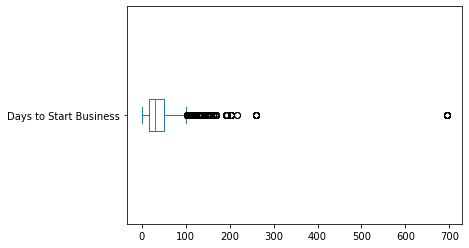

In [22]:
df_new_2["Days to Start Business"].plot(kind="box", vert=False)

In [26]:
df_new[df_new_2["Days to Start Business"] == df_new_2["Days to Start Business"].max()]

,Country/Region,Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
201,Suriname,The Americas,2000-12-01,0.023,0.489717,2127.0,NaN,NaN,NaN,8.921644e+08,...,65.0,0.088,1,0.306,0.637,0.057,466668,0.664,42000000.0,67000000.0
408,Suriname,The Americas,2001-12-01,0.022,0.489717,2266.0,NaN,NaN,NaN,7.634656e+08,...,65.0,0.184,1,0.304,0.638,0.058,473312,0.665,26000000.0,62000000.0
615,Suriname,The Americas,2002-12-01,0.022,0.489717,2252.0,NaN,NaN,NaN,1.078402e+09,...,65.0,0.226,1,0.303,0.639,0.059,480099,0.666,17000000.0,54000000.0
822,Suriname,The Americas,2003-12-01,0.021,0.489717,2241.0,NaN,NaN,NaN,1.271196e+09,...,65.0,0.346,1,0.301,0.639,0.059,486867,0.667,18000000.0,68000000.0
2324,Suriname,The Americas,2004-12-01,0.021,0.489717,2292.0,NaN,NaN,664.0,1.484093e+09,...,65.0,0.431,1,0.300,0.640,0.060,493394,0.667,52000000.0,85000000.0
2366,Suriname,The Americas,2005-12-01,0.020,0.279000,2380.0,694.0,NaN,696.0,1.793558e+09,...,66.0,0.466,1,0.299,0.640,0.061,499523,0.667,96000000.0,94000000.0
2410,Suriname,The Americas,2006-12-01,0.020,0.279000,2442.0,694.0,NaN,714.0,2.626093e+09,...,66.0,0.633,1,0.297,0.641,0.062,505186,0.666,109000000.0,33000000.0
2453,Suriname,The Americas,2007-12-01,0.019,0.279000,2442.0,694.0,NaN,714.0,2.936612e+09,...,66.0,0.744,1,0.295,0.643,0.062,510433,0.665,73000000.0,28000000.0
2497,Suriname,The Americas,2008-12-01,0.019,0.279000,2442.0,694.0,NaN,714.0,3.532969e+09,...,67.0,1.275,1,0.293,0.644,0.063,515372,0.665,83000000.0,35000000.0
2541,Suriname,The Americas,2009-12-01,0.019,0.279000,2468.0,694.0,NaN,714.0,3.875410e+09,...,67.0,1.469,1,0.290,0.647,0.064,520173,0.664,70000000.0,35000000.0


To start business in Suriname takes **694 days**. After doing some research we found out that this data is correct. Hovewer since 2012 the days to start business in Suriname was droppping and according to the World Bank Ease of Doing Business Report, starting a business takes in 2022, on average, 66 days.

### 4.2 Lending Interest

<AxesSubplot:>

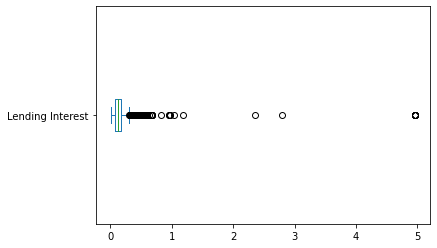

In [24]:
df_new_2["Lending Interest"].plot(kind="box", vert=False)

In [25]:
df_new_2[["Country/Region", "Lending Interest"]][df_new_2["Lending Interest"]>1]

,Country/Region,Lending Interest
925,Uruguay,1.184
1274,Angola,1.032
2279,Zimbabwe,2.789
2280,Zimbabwe,2.357
2281,Zimbabwe,4.965
2282,Zimbabwe,4.965
2283,Zimbabwe,4.965
2284,Zimbabwe,4.965
2285,Zimbabwe,4.965
2286,Zimbabwe,4.965


After researching we found out that data for Lending rates are correct as well. For more information click [here](https://www.ceicdata.com/en/zimbabwe/interest-rates)

### 4.3 Hours to do Tax

<AxesSubplot:>

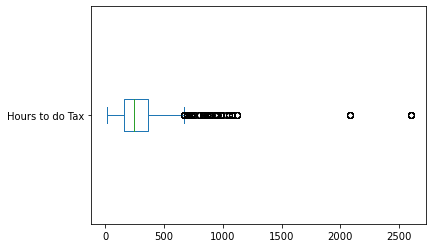

In [26]:
df_new_2["Hours to do Tax"].plot(kind="box", vert=False)

In [28]:
df_new_2[df_new_2["Hours to do Tax"] > 2000]

,Country/Region,Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
65,Ukraine,Europe,2000-12-01,0.008,0.489717,320774.0,40.0,140.0,133794.0,3.126153e+10,0.056,36.0,2085.0,0.016,0.007,0.415,74.0,62.0,0.017,1,0.175,0.688,0.138,49175848,0.671,5.630000e+08,5.610000e+08
66,Ukraine,Europe,2001-12-01,0.008,0.489717,321651.0,40.0,140.0,134096.0,3.800934e+10,0.057,44.0,2085.0,0.015,0.012,0.323,74.0,63.0,0.046,1,0.168,0.691,0.141,48683865,0.672,7.590000e+08,6.760000e+08
67,Ukraine,Europe,2002-12-01,0.009,0.489717,318684.0,40.0,140.0,135601.0,4.239290e+10,0.063,55.0,2085.0,0.014,0.019,0.253,74.0,63.0,0.077,1,0.162,0.692,0.145,48202500,0.673,1.001000e+09,7.940000e+08
68,Ukraine,Europe,2003-12-01,0.009,0.489717,352259.0,40.0,140.0,144641.0,5.013295e+10,0.069,73.0,2085.0,0.014,0.031,0.179,74.0,63.0,0.136,1,0.156,0.693,0.150,47812950,0.674,1.204000e+09,9.530000e+08
69,Ukraine,Europe,2004-12-01,0.009,0.489717,343121.0,34.0,140.0,143843.0,6.488306e+10,0.066,90.0,2085.0,0.013,0.035,0.174,74.0,63.0,0.289,1,0.151,0.694,0.155,47451600,0.676,2.931000e+09,2.660000e+09
70,Ukraine,Europe,2005-12-01,0.009,0.573000,333869.0,34.0,140.0,142883.0,8.614202e+10,0.064,117.0,2085.0,0.013,0.037,0.162,74.0,62.0,0.637,1,0.147,0.695,0.158,47105150,0.678,3.542000e+09,3.078000e+09
71,Ukraine,Europe,2006-12-01,0.010,0.570000,326480.0,33.0,140.0,137333.0,1.080000e+11,0.064,147.0,2085.0,0.012,0.045,0.152,74.0,62.0,1.047,1,0.143,0.697,0.160,46787750,0.680,4.018000e+09,3.202000e+09
72,Ukraine,Europe,2007-12-01,0.010,0.566000,327595.0,27.0,140.0,137343.0,1.430000e+11,0.064,194.0,2085.0,0.012,0.066,0.139,74.0,63.0,1.184,1,0.141,0.698,0.161,46509350,0.681,5.320000e+09,4.022000e+09
1183,Brazil,The Americas,2000-12-01,0.021,0.489717,327984.0,152.0,118.0,187442.0,6.450000e+11,0.072,265.0,2600.0,0.029,0.029,0.568,74.0,67.0,0.133,1,0.296,0.649,0.055,174504898,0.812,1.969000e+09,4.548000e+09
1184,Brazil,The Americas,2001-12-01,0.020,0.489717,337434.0,152.0,118.0,190712.0,5.540000e+11,0.073,228.0,2600.0,0.027,0.045,0.576,74.0,67.0,0.162,1,0.291,0.653,0.056,176968205,0.816,1.844000e+09,3.765000e+09


After checking with [data world bank](https://data.worldbank.org) we confirm that these data are correct.<br>
**This show us our dataset is pretty interesting and we will have a lot of fun vizualizing it.**

<a id="5"></a>
## 5. New Features

As a last task we have to do during our data cleaning process we will:<br>
***1. Remove*** redundant columns namely "Number of Records".<br>
***2. Create*** new columns to help us better understand the data when creating visualizations.

In [29]:
df_new_2.drop(columns = "Number of Records", inplace = True)

In [30]:
df_new_2["GDP/Capita"] = df_new_2["GDP"]/df_new_2["Population Total"]
df_new_2["Life Expectancy"] = (df_new_2["Life Expectancy Male"]+df_new_2["Life Expectancy Female"])/2

GDP_by_year_dict = df_new_2.groupby("Year").GDP.sum().to_dict()
df_new_2["GDP World Total"] = df_new_2.Year.map(GDP_by_year_dict)
df_new_2["% of Total GDP"]  = df_new_2["GDP"]/df_new_2["GDP World Total"]

<a id="6"></a>
## 6. Exporting dataset

In [36]:
df_new_2.to_excel("Data - World_Indicators_Cleaned.xlsx", sheet_name = "Wrold Indicators", index = False)